In [290]:
# Objective : calculate Weight of Evidence and Information Value

In [291]:
import pandas as pd
import numpy as np

In [292]:
df = pd.read_csv('E:\Data Science\R\it box\data\Social_Network_Ads.csv')

In [293]:
df

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


<AxesSubplot: >

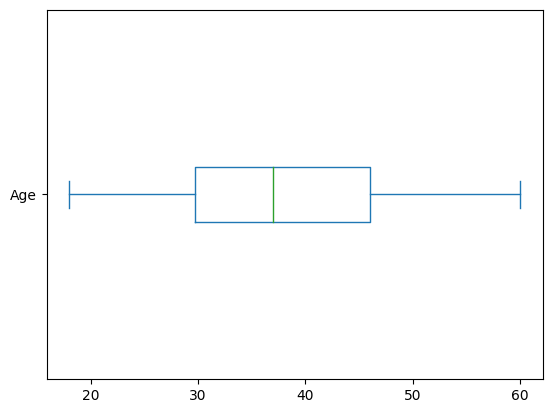

In [294]:
df.Age.plot.box(vert=False)

<AxesSubplot: ylabel='Frequency'>

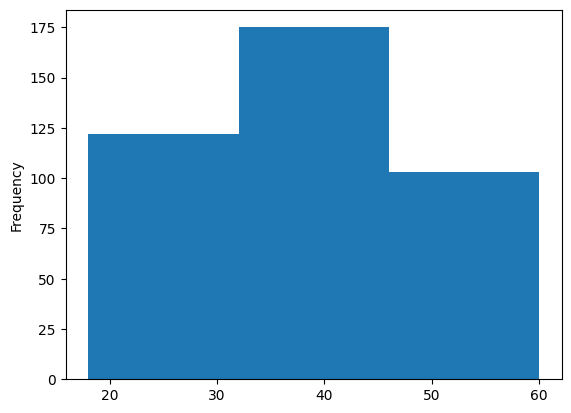

In [295]:
df.Age.plot.hist(bins=3)

In [296]:
# Split age data values
df['bins'] = pd.cut(x=df.Age, bins=[15, 30, 45, 60])
df['Age'] = pd.cut(x=df.Age, bins=[15, 30, 45, 60], labels=['young', 'adult', 'old'])

In [297]:
df

,User ID,Age,EstimatedSalary,Purchased,bins
0,15624510,young,19000,0,"(15, 30]"
1,15810944,adult,20000,0,"(30, 45]"
2,15668575,young,43000,0,"(15, 30]"
3,15603246,young,57000,0,"(15, 30]"
4,15804002,young,76000,0,"(15, 30]"
...,...,...,...,...,...
395,15691863,old,41000,1,"(45, 60]"
396,15706071,old,23000,1,"(45, 60]"
397,15654296,old,20000,1,"(45, 60]"
398,15755018,adult,33000,0,"(30, 45]"


In [298]:
y = df.Purchased

### WoE and IV values

In [299]:
new_df = pd.concat([df[['bins', 'Age']], y], axis=1)

In [300]:
new_df

,bins,Age,Purchased
0,"(15, 30]",young,0
1,"(30, 45]",adult,0
2,"(15, 30]",young,0
3,"(15, 30]",young,0
4,"(15, 30]",young,0
...,...,...,...
395,"(45, 60]",old,1
396,"(45, 60]",old,1
397,"(45, 60]",old,1
398,"(30, 45]",adult,0


In [301]:
new_df = pd.concat([new_df.groupby('Age', as_index = False).agg({'Purchased': sum}), new_df.groupby('Age', as_index = False)['Purchased'].count()], axis=1)

In [302]:
new_df

,Age,Purchased,Age,Purchased
0,young,6,young,111
1,adult,49,adult,186
2,old,88,old,103


In [303]:
new_df = new_df.iloc[:, [0,1,3]]

In [304]:
new_df

,Age,Purchased,Purchased
0,young,6,111
1,adult,49,186
2,old,88,103


In [305]:
new_df.columns = [new_df.columns.values[0], 'n_good', 'n_obs']

In [306]:
new_df

,Age,n_good,n_obs
0,young,6,111
1,adult,49,186
2,old,88,103


In [307]:
new_df['n_bad'] = new_df['n_obs'] - new_df['n_good']

In [308]:
new_df

,Age,n_good,n_obs,n_bad
0,young,6,111,105
1,adult,49,186,137
2,old,88,103,15


In [309]:
new_df['bad_rate_pct'] = round((new_df['n_bad'] / new_df['n_obs']) * 100, 2)

In [310]:
new_df

,Age,n_good,n_obs,n_bad,bad_rate_pct
0,young,6,111,105,94.59
1,adult,49,186,137,73.66
2,old,88,103,15,14.56


In [311]:
new_df['prop_good'] = new_df['n_good'] / new_df['n_good'].sum()

In [312]:
new_df

,Age,n_good,n_obs,n_bad,bad_rate_pct,prop_good
0,young,6,111,105,94.59,0.041958
1,adult,49,186,137,73.66,0.342657
2,old,88,103,15,14.56,0.615385


In [313]:
new_df['prop_bad'] = new_df['n_bad'] / new_df['n_bad'].sum()

In [314]:
new_df

,Age,n_good,n_obs,n_bad,bad_rate_pct,prop_good,prop_bad
0,young,6,111,105,94.59,0.041958,0.408560
1,adult,49,186,137,73.66,0.342657,0.533074
2,old,88,103,15,14.56,0.615385,0.058366


In [315]:
new_df['WoE'] = np.log(new_df['prop_good'] / new_df['prop_bad'])

In [316]:
new_df

,Age,n_good,n_obs,n_bad,bad_rate_pct,prop_good,prop_bad,WoE
0,young,6,111,105,94.59,0.041958,0.408560,-2.275969
1,adult,49,186,137,73.66,0.342657,0.533074,-0.441929
2,old,88,103,15,14.56,0.615385,0.058366,2.355518


In [317]:
new_df['IV'] = ((new_df['prop_good'] - new_df['prop_bad']) * new_df['WoE']).sum()

In [318]:
new_df

,Age,n_good,n_obs,n_bad,bad_rate_pct,prop_good,prop_bad,WoE,IV
0,young,6,111,105,94.59,0.041958,0.408560,-2.275969,2.230594
1,adult,49,186,137,73.66,0.342657,0.533074,-0.441929,2.230594
2,old,88,103,15,14.56,0.615385,0.058366,2.355518,2.230594
